In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("D:\data science\Ecommerce_Customers (2).csv")
df


,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [2]:
# Overview of the Dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [3]:
#few rows of the dataset
df.head()  



,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#Descriptive Statistics
print(df.describe())  

       Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly Amount Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462  


In [5]:
#Checking for Missing Values
df.isnull().sum() 


Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
#Check for Duplicates
df.duplicated().sum()  

0

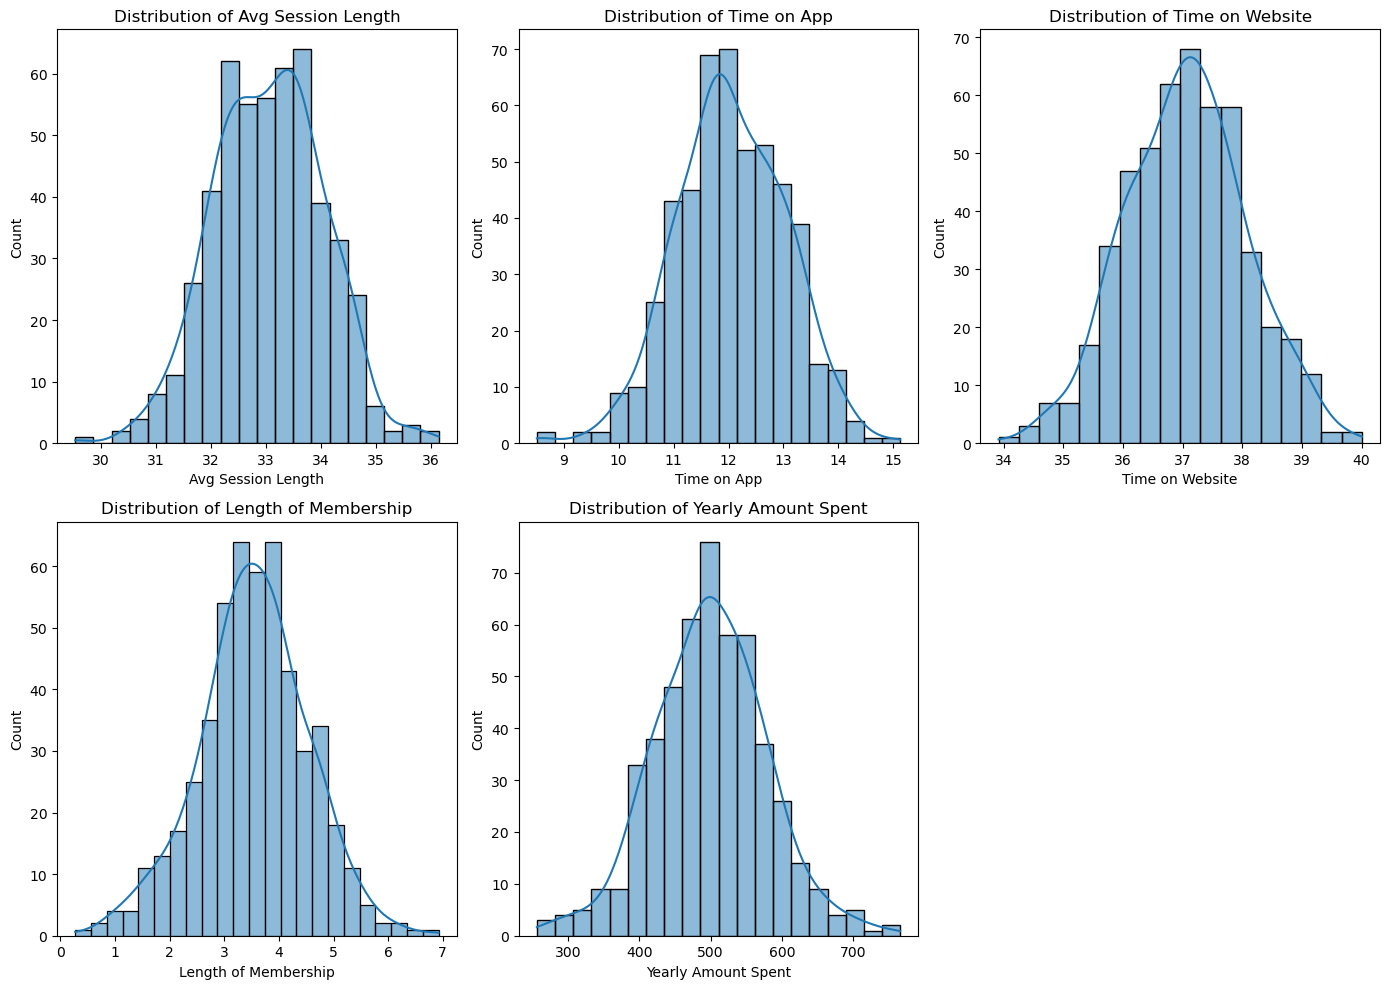

In [7]:
#Visualizing Distributions of Numerical Features
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



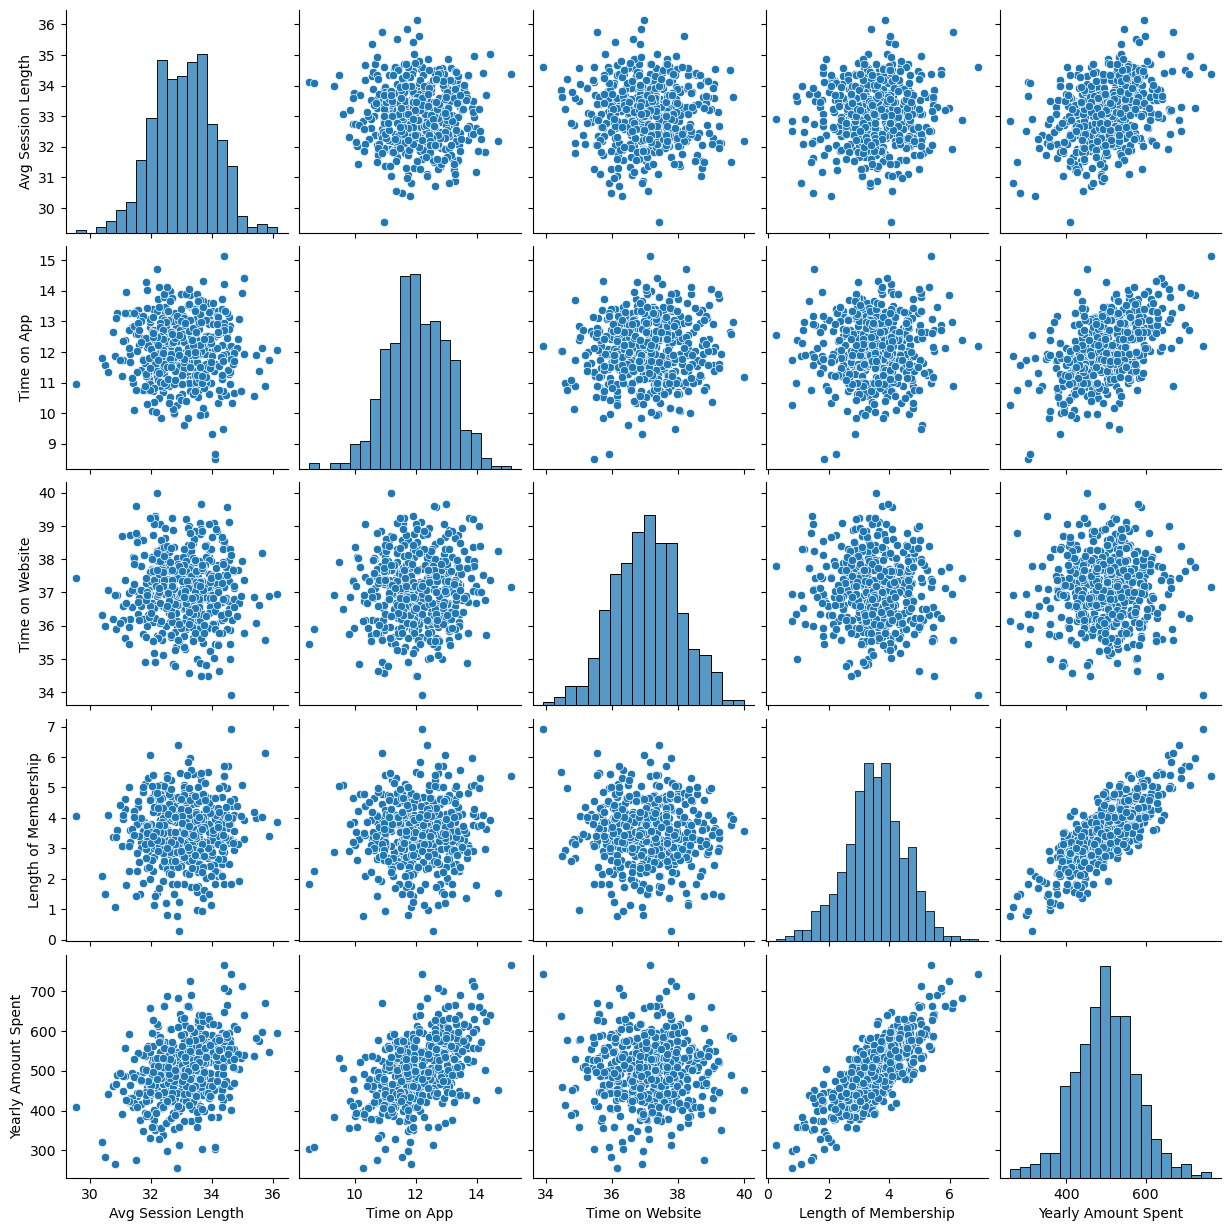

In [8]:
#Pairplot of All Features
sns.pairplot(df)
plt.show()


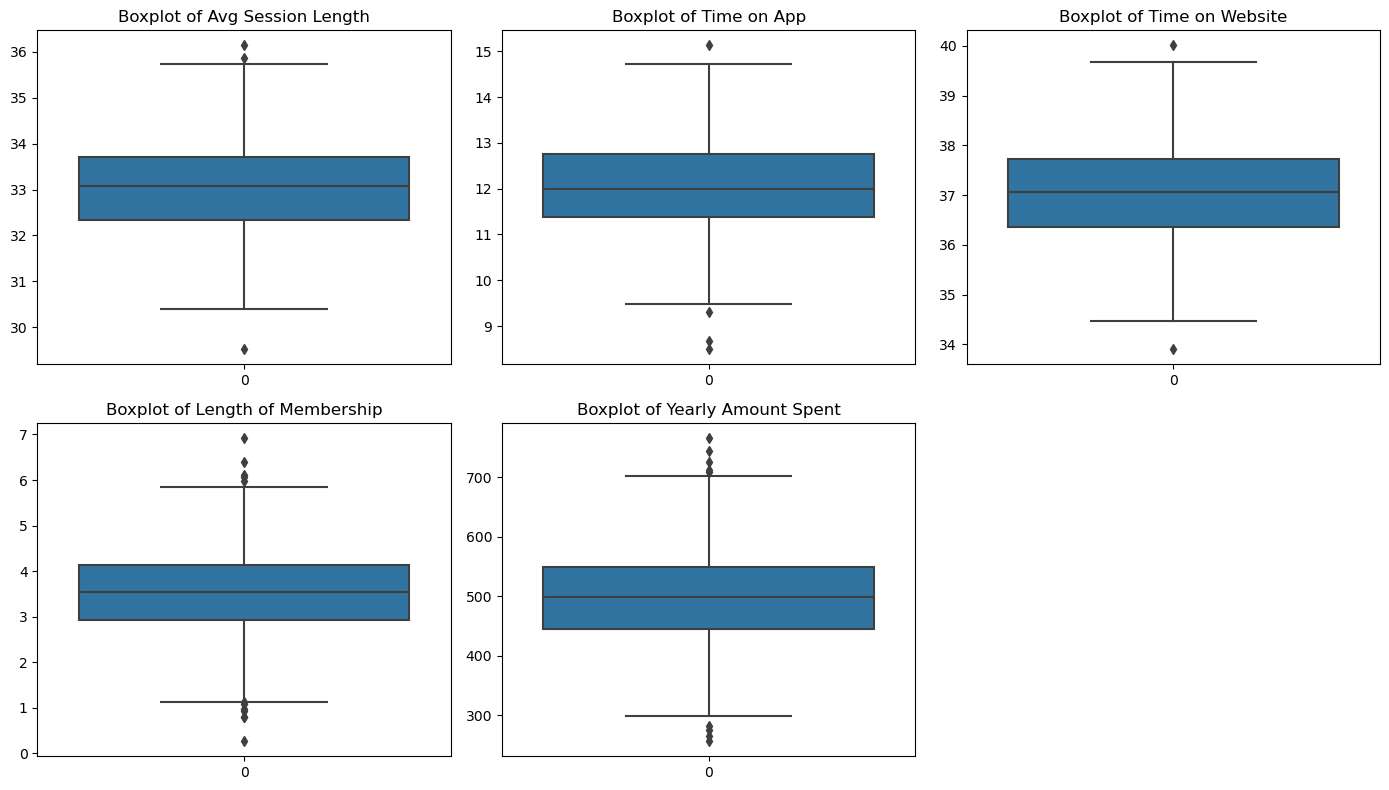

In [9]:
#Boxplots to detect outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
# Define numerical columns
numerical_columns = ['Avg Session Length', 'Time on App', 'Time on Website', 
                     'Length of Membership', 'Yearly Amount Spent']

# Initialize dictionary to store count of outliers for each column
outlier_counts = {}

# Calculate and count outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# Display the number of outliers removed for each column
print("Number of Outliers in Each Column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")


Number of Outliers in Each Column:
Avg Session Length: 3
Time on App: 4
Time on Website: 2
Length of Membership: 12
Yearly Amount Spent: 9


In [11]:
# Define numerical columns
numerical_columns = ['Avg Session Length', 'Time on App', 'Time on Website', 
                     'Length of Membership', 'Yearly Amount Spent']

# Remove outliers based on IQR for each numerical column
df_cleaned = df.copy()  # Create a copy to keep original data intact

for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to keep only non-outliers
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Display the cleaned data's shape to confirm the removal
print("Original data shape:", df.shape)
print("Cleaned data shape:", df_cleaned.shape)


Original data shape: (500, 8)
Cleaned data shape: (474, 8)


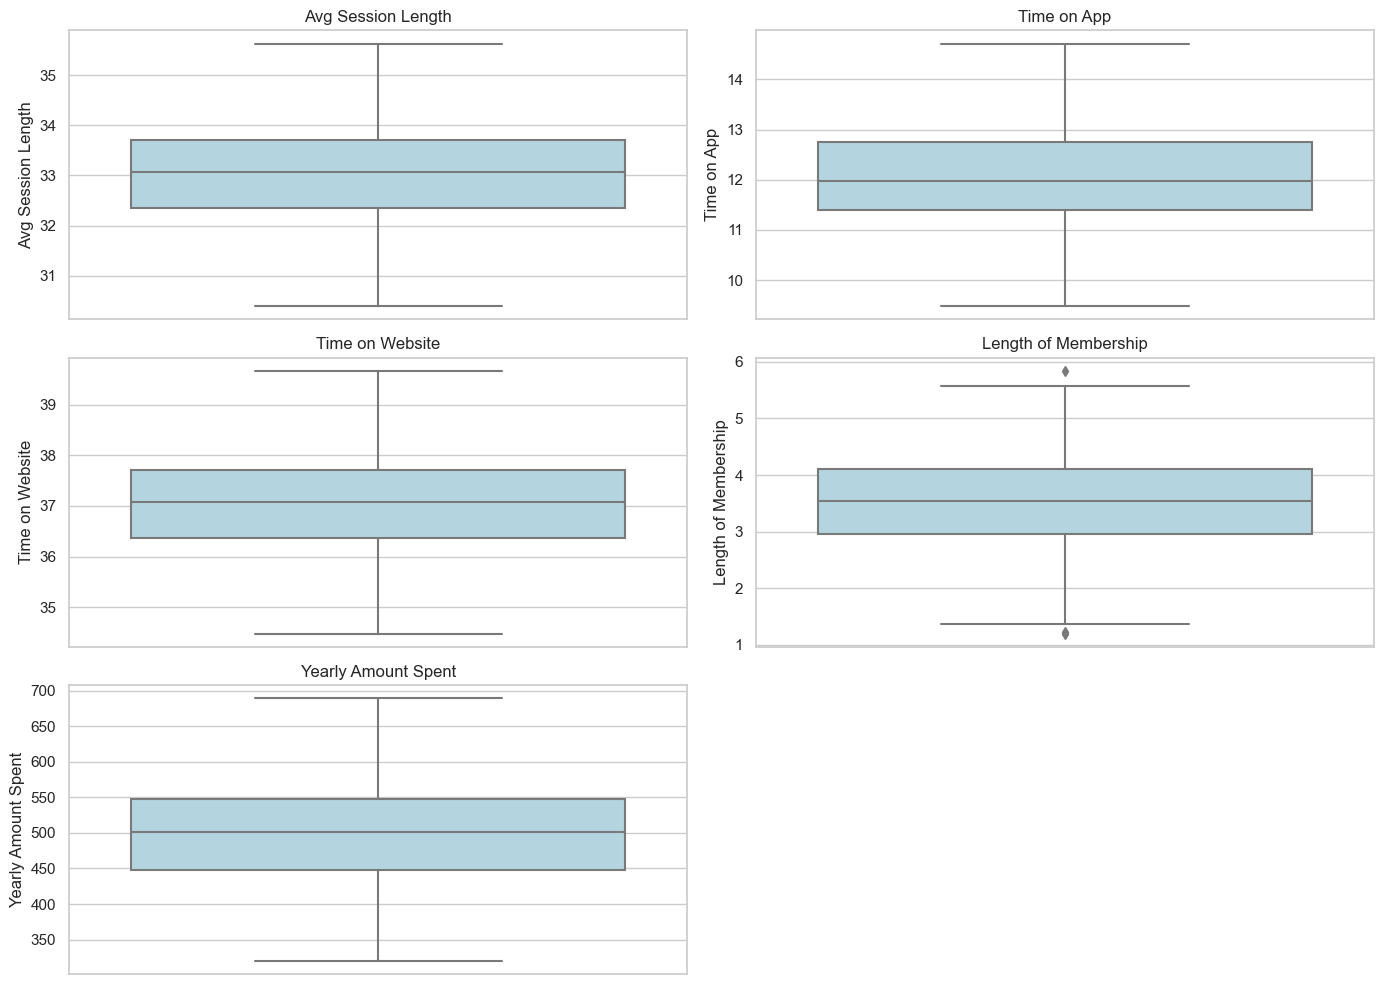

In [12]:
#After Removing Outliers
# Set up visual style
sns.set(style="whitegrid")

# List of numerical columns for box plots
numerical_columns = ['Avg Session Length', 'Time on App', 'Time on Website', 
                     'Length of Membership', 'Yearly Amount Spent']

# Create a figure with subplots for each numerical feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # Arrange plots in a 3x2 grid
    sns.boxplot(data=df_cleaned, y=column, color='lightblue')
    plt.title(f"{column}")
    plt.tight_layout()  # Adjust layout

plt.show()

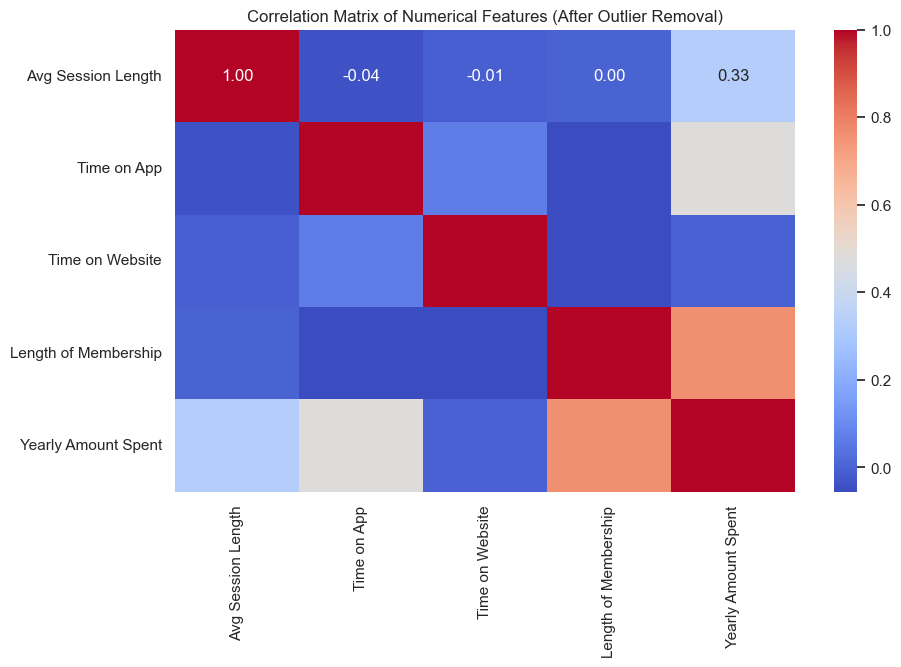

In [13]:
numerical_data = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features (After Outlier Removal)")
plt.show()

In [14]:
# Define the target variable
target_variable = 'Yearly Amount Spent'

# Select only numerical columns
numerical_data = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation of each feature with the target variable
correlation_with_target = numerical_data.corr()[target_variable].sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation of features with 'Yearly Amount Spent':\n", correlation_with_target)


Correlation of features with 'Yearly Amount Spent':
 Yearly Amount Spent     1.000000
Length of Membership    0.761956
Time on App             0.480231
Avg Session Length      0.331589
Time on Website        -0.005199
Name: Yearly Amount Spent, dtype: float64


In [15]:
# Separate the features (X) and target variable (y)
target_variable = 'Yearly Amount Spent'
X = df_cleaned.drop(target_variable, axis=1)  # Features
y = df_cleaned[target_variable]  # Target

# One-Hot Encode all categorical variables in X
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Scale the numerical features in X_encoded
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64']).columns  # Original numerical columns
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Display the shape of the data to confirm encoding
print("Shape of original features (X):", X.shape)
print("Shape of encoded features (X_encoded):", X_encoded.shape)

# Display the processed feature set and target variable
print("\nProcessed Feature Set (X):\n", X_encoded.head())
print("\nTarget Variable (y):\n", y.head())


Shape of original features (X): (474, 7)
Shape of encoded features (X_encoded): (474, 1087)

Processed Feature Set (X):
    Avg Session Length  Time on App  Time on Website  Length of Membership  \
0            1.548977     0.616250         2.518109              0.602650   
1           -1.178959    -1.002259         0.199653             -0.994942   
2           -0.038718    -0.771113         0.040623              0.627339   
3            1.345563     1.727777        -0.350336             -0.481238   
4            0.311169     0.762314         0.468477              1.012230   

   Email_aaron11@luna.com  Email_aaron22@gmail.com  Email_aaron89@gmail.com  \
0                       0                        0                        0   
1                       0                        0                        0   
2                       0                        0                        0   
3                       0                        0                        0   
4                    

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded[numerical_columns], y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Print results
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("RMSE:", rmse_lr)


Mean Squared Error: 92.51168957716652
R-squared: 0.9785595417268145
RMSE: 9.618299723816394


In [17]:
import pandas as pd
import numpy as np

# Define a threshold for high spending
threshold = df_cleaned['Yearly Amount Spent'].median()

# Create a binary target variable
df_cleaned['High Spender'] = np.where(df_cleaned['Yearly Amount Spent'] > threshold, 1, 0)

# Separate the features (X) and new binary target variable (y)
X = df_cleaned.drop(['Yearly Amount Spent', 'High Spender'], axis=1)
y = df_cleaned['High Spender']

# Check the shape of the data
print("Shape of features after encoding:", X_encoded.shape)
print("Distribution of target variable:", y.value_counts())


Shape of features after encoding: (474, 1087)
Distribution of target variable: 1    237
0    237
Name: High Spender, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9473684210526315
Confusion Matrix:
 [[41  2]
 [ 3 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.96      0.94      0.95        52

    accuracy                           0.95        95
   macro avg       0.95      0.95      0.95        95
weighted avg       0.95      0.95      0.95        95



In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded[numerical_columns], y, test_size=0.2, random_state=42)

# Initialize the SVR model with an RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Print results
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)
print("RMSE:", rmse_svr)

Mean Squared Error: 0.06342055645301131
R-squared: 0.7440203390033868
RMSE: 0.2518343829841575


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Print the evaluation metrics
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)
print("RMSE:", rmse_tree)

Mean Squared Error: 0.1368421052631579
R-squared: 0.44767441860465107
RMSE: 0.36992175559590695


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with 100 trees
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("Root Mean Squared Error:", rmse_rf)

Mean Squared Error: 0.058098947368421056
R-squared: 0.7654995527728086
Root Mean Squared Error: 0.2410372323281635


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Train the model on the training data
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred = gbr.predict(X_test)


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Corrected line
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)









Mean Absolute Error (MAE): 0.15927848091855118
Mean Squared Error (MSE): 0.0585708542244847
Root Mean Squared Error (RMSE): 0.2420141612064978
R-squared (R2): 0.7635948303327484


In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Ridge and Lasso Regression models with regularization parameter alpha
alpha_value = 0.1  # Adjust this value as needed

rid = Ridge(alpha=alpha_value)
las = Lasso(alpha=alpha_value)

# Train the Ridge model on the training data
rid.fit(X_train, y_train)
y_pred_rid = rid.predict(X_test)

# Train the Lasso model on the training data
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test)

# Evaluate the Ridge model
print("Ridge Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rid))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rid))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rid)))
print("R-squared (R2):", r2_score(y_test, y_pred_rid))


# Evaluate the Lasso model
print("\nLasso Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_las))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_las))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_las)))
print("R-squared (R2):", r2_score(y_test, y_pred_las))


Ridge Regression Results:
Mean Absolute Error (MAE): 0.2564063379485746
Mean Squared Error (MSE): 0.09087593392183446
Root Mean Squared Error (RMSE): 0.301456354920301
R-squared (R2): 0.6332042470283739

Lasso Regression Results:
Mean Absolute Error (MAE): 0.32979472163732365
Mean Squared Error (MSE): 0.12556585816263247
Root Mean Squared Error (RMSE): 0.3543527312758185
R-squared (R2): 0.4931878935967092
